### **Hitters** 
**Data set contains information on Major League Baseball. Among other information, it contains annual salary of baseball players (in thousands of dollars) on opening day of the season. Our goal is to predict salaries of the players.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

from dmba import plotDecisionTree, classificationSummary, regressionSummary
from dmba import regressionSummary, exhaustive_search
from dmba import adjusted_r2_score, AIC_score

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="white", palette="terrain", rc=custom_params)

In [2]:
hitter = pd.read_csv('Hitters.csv')
hitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [3]:
hitter.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,263.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,451.118681
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,190.000000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,425.000000
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


**Qno. 1**

**Remove the observations with unknown salary information. How many observations were removed in this process?**

Ans: 59 observations were removed in this process. 

In [4]:
print(hitter.isnull().sum().sum())

59


In [5]:
hitter.dropna(inplace=True)

In [6]:
hitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      263 non-null    int64  
 1   Hits       263 non-null    int64  
 2   HmRun      263 non-null    int64  
 3   Runs       263 non-null    int64  
 4   RBI        263 non-null    int64  
 5   Walks      263 non-null    int64  
 6   Years      263 non-null    int64  
 7   CAtBat     263 non-null    int64  
 8   CHits      263 non-null    int64  
 9   CHmRun     263 non-null    int64  
 10  CRuns      263 non-null    int64  
 11  CRBI       263 non-null    int64  
 12  CWalks     263 non-null    int64  
 13  League     263 non-null    object 
 14  Division   263 non-null    object 
 15  PutOuts    263 non-null    int64  
 16  Assists    263 non-null    int64  
 17  Errors     263 non-null    int64  
 18  Salary     263 non-null    float64
 19  NewLeague  263 non-null    object 
dtypes: float64

In [7]:
print(hitter.isnull().sum().sum())

0


**Qno. 2**

**Transform the salaries using a (natural) log transformation. Is there any justification for this transformation? Explain your answer.**

Ans: Here we are transforming Salary variable because the salary variable has its data points in thousands. So, by transforming the variable we reduce or we can say, we remove the skewness from the original data. It also helps to curtails the effect of outliers. And helps us put the data into nice normal distribution curve or plot.

In [8]:
hitter['Salary'] = np.log(hitter['Salary'])
hitter

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,6.163315,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,6.173786,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,6.214608,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,4.516339,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,6.620073,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,6.551080,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,6.774224,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,5.953243,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,6.866933,A


In [9]:
hitter['NewLeague'] = pd.Categorical(hitter['NewLeague'])
hitter['League'] = pd.Categorical(hitter['League'])
hitter['Division'] = pd.Categorical(hitter['Division'])
hitter.dtypes

AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League       category
Division     category
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague    category
dtype: object

**Qno. 3**

**Create a scatterplot with Hits on the y-axis and Years on the x-axis using all the observations. Color code the observations using the log Salary variable. What patterns do you notice on this chart, if any?**

Ans: From the below graph we can interpret that players which have high Hits have higher salary than others. And as well as people who have more than 5 years of experierence tend to have higher salary than the average. 

Text(0, 0.5, 'Hits')

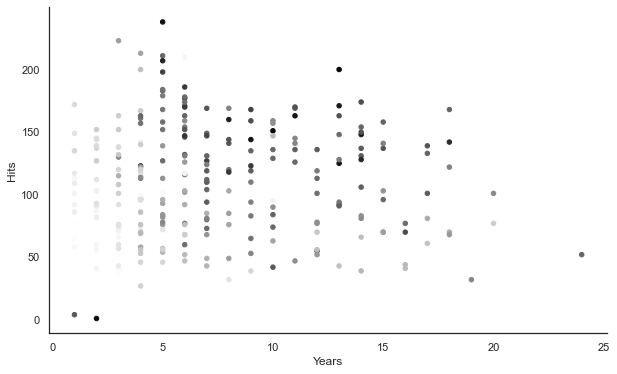

In [42]:
hitter.plot.scatter(x = 'Years', y= 'Hits', c =hitter.Salary, figsize = (10, 6))
plt.xlabel("Years")
plt.ylabel("Hits")

**Qno. 4**

**Run a linear regression model of Log Salary on all the predictors using the entire dataset. Use an exhaustive search model. Which predictor variables are included in the (best) model?**

Ans: The predictors that are included in best model are 'Walks', 'CHits', 'CWalks', 'PutOuts', and 'Division_E'.

In [11]:
predictors = ['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League',
            'Division','PutOuts','Assists','Errors','NewLeague']
outcome = 'Salary'

In [12]:
X = pd.get_dummies(hitter[predictors])
y = hitter[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=123)

In [13]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)

data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 200)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj         AIC  Assists  AtBat  CAtBat  CHits  CHmRun   CRBI  CRuns  ...  HmRun  League_A  League_N  NewLeague_A  NewLeague_N  PutOuts    RBI   Runs  Walks  Years
0    1  0.441817  425.384908    False  False   False   True   False  False  False  ...  False     False     False        False        False    False  False  False  False  False
1    2  0.497669  404.232856    False  False   False   True   False  False  False  ...  False     False     False        False        False    False  False  False   True  False
2    3  0.515096  397.801011    False  False   False   True   False  False  False  ...  False     False     False        False        False     True  False   True  False  False
3    4  0.522456  395.567587    False  False   False   True   False  False  False  ...  False     False     False        False        False     True  False  False   True  False
4    5  0.534646  391.110223    False  False   False   True   False  False  False  ...  False     False     False  

In [44]:
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)
pd.set_option('display.width', 200)
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))
pd.reset_option('display.width')

     n     r2adj         AIC  Assists  AtBat  CAtBat  CHits  CHmRun   CRBI  CRuns  ...  HmRun  League_A  League_N  NewLeague_A  NewLeague_N  PutOuts    RBI   Runs  Walks  Years
0    1  0.441817  425.384908    False  False   False   True   False  False  False  ...  False     False     False        False        False    False  False  False  False  False
1    2  0.497669  404.232856    False  False   False   True   False  False  False  ...  False     False     False        False        False    False  False  False   True  False
2    3  0.515096  397.801011    False  False   False   True   False  False  False  ...  False     False     False        False        False     True  False   True  False  False
3    4  0.522456  395.567587    False  False   False   True   False  False  False  ...  False     False     False        False        False     True  False  False   True  False
4    5  0.534646  391.110223    False  False   False   True   False  False  False  ...  False     False     False  

In [45]:
data_final = pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))
data = data_final.iloc[4][:]
print(data)

n                       5
r2adj            0.534646
AIC            391.110223
Assists             False
AtBat               False
CAtBat              False
CHits                True
CHmRun              False
CRBI                False
CRuns               False
CWalks               True
Division_E           True
Division_W          False
Errors              False
Hits                False
HmRun               False
League_A            False
League_N            False
NewLeague_A         False
NewLeague_N         False
PutOuts              True
RBI                 False
Runs                False
Walks                True
Years               False
Name: 4, dtype: object


**Qno. 5**

**Now create a training data set consisting of 80 percent of the observations, and a test data set consisting of the remaining 20 percent of the observations.**

Ans

In [24]:
predictors1 = ['Hits','Years']
outcome1 = 'Salary'

X = pd.get_dummies(hitter[predictors1], drop_first=True)
y = hitter[outcome1]

X.shape

(263, 2)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)  

**Qno. 6**

**Generate a regression tree of log Salary using only Years and Hits variables from the training data set. Which players are likely to receive highest salaries according to this model? Write down the rule and elaborate on it.**

Ans From the below decision tree, players are likely to receive highest salaries are:

1. People who experience years equal more than 4.5 years.
2. People who have Hits more than 199 but less 205.

We will start with first node which has condition of years < 4.5 years but as our rule is inclined towards the highest salary and decision out is moving towards false so our rule changes to people who have years equal or more than 4.5 years. Then the decision tree moves to another node which has Hits for its condition, which is Hits < 103.5. As again our condition is moving towards false then our rules invert to people with Hits > 103.5. Now the decision tree has another condition if the hits are less than 205, and here our condition states true for highest salary then our rule for this is people who have hits less than 205. Now there is another condition with Hits less than 199 and here our condition holds false. So, our rule will be people with Hits more than 199. Now, we have reached our terminal node which has the highest average Salary of all. Now for the selection of rules of Hits, we choose the condition which holds more accurately and true for all the condtion of hits. Our final rule is if players have years equal or more than 4.5 and Hits lies between 199 and 205 than they will get the highest salary.

Above two are the rules which will give players highest salary of an average of log salary 7.788 which is 2411.49

In [29]:
reg1 = DecisionTreeRegressor(max_depth=6)
model1 = reg1.fit(X_train, y_train)
pred1 = reg1.predict(X_test)
model1_mse = mean_squared_error(pred1, y_test)
print('Overall MSE: ', model1_mse)

Overall MSE:  0.7231069595465699


In [33]:
regressionSummary(y_train, reg1.predict(X_train))
regressionSummary(y_test, reg1.predict(X_test))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 0.3558
            Mean Absolute Error (MAE) : 0.2476
          Mean Percentage Error (MPE) : -0.3360
Mean Absolute Percentage Error (MAPE) : 4.1202

Regression statistics

                      Mean Error (ME) : 0.0784
       Root Mean Squared Error (RMSE) : 0.8504
            Mean Absolute Error (MAE) : 0.5351
          Mean Percentage Error (MPE) : 0.2065
Mean Absolute Percentage Error (MAPE) : 8.9430


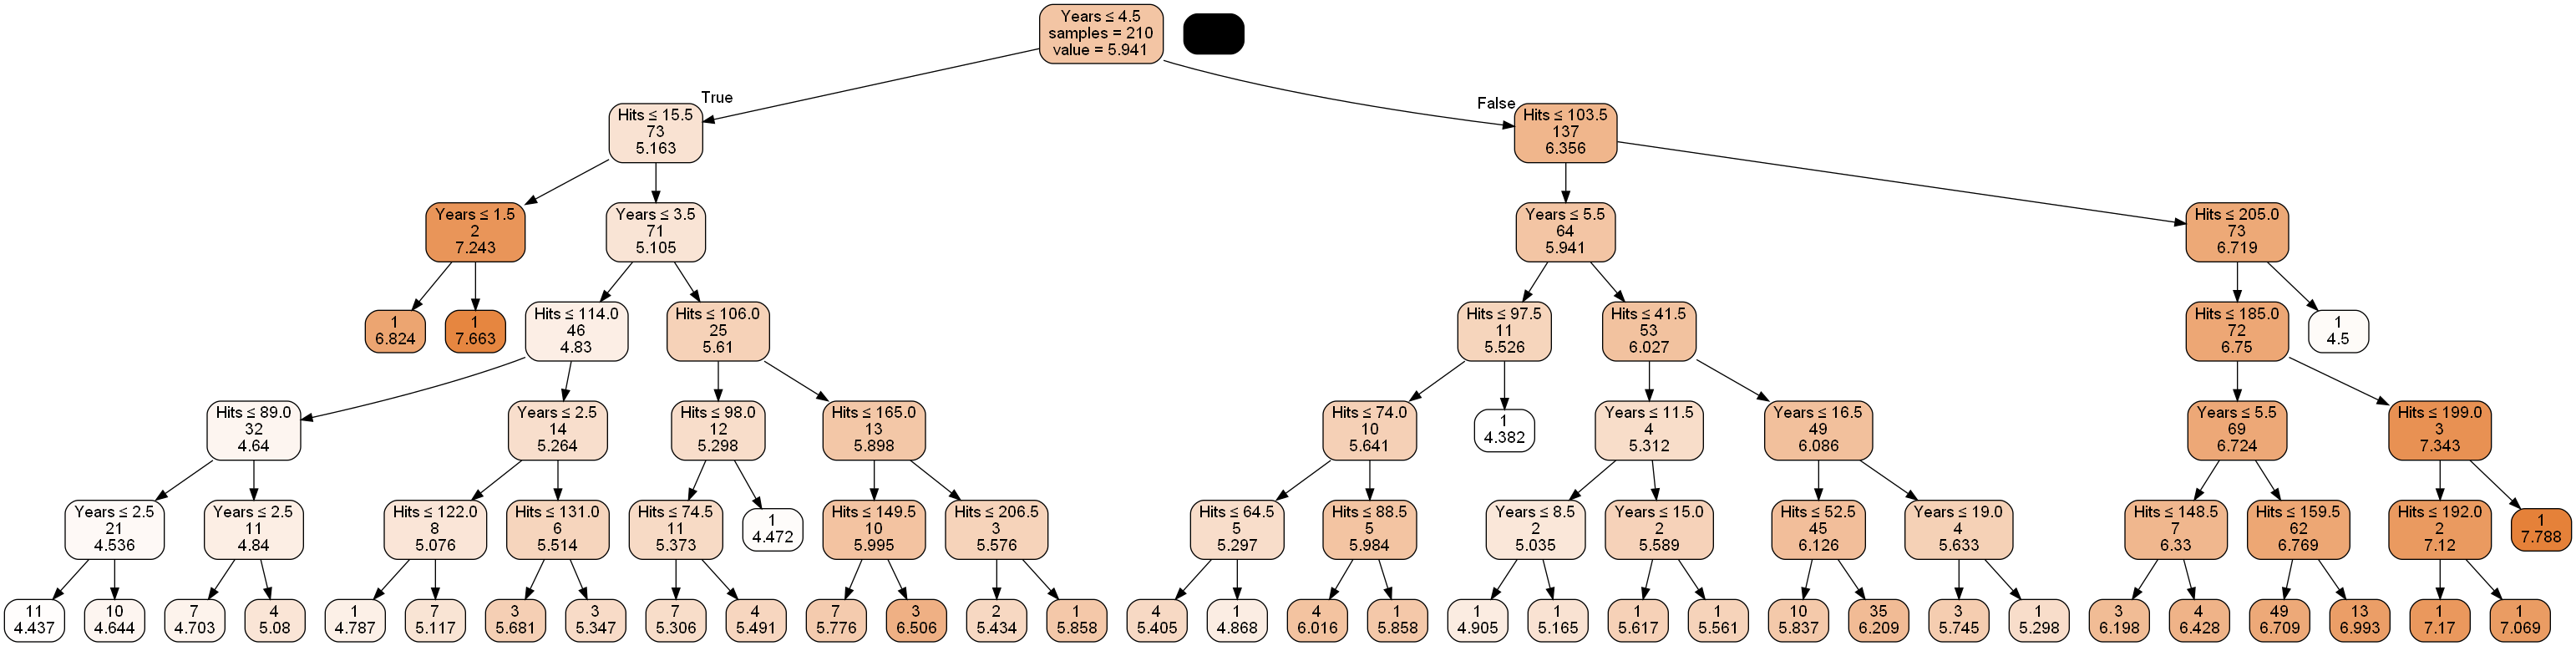

In [34]:
plotDecisionTree(reg1, feature_names= X_train.columns)

**Qno. 7**

**Now create a regression tree using all the variables in the training data set. Perform boosting on the training set with 1,000 trees. Print the MSE from the test data set.**

Ans The MSE value from the test data set is 0.29

In [35]:
X = pd.get_dummies(hitter[predictors], drop_first=True)
y = hitter[outcome]

X.shape

(263, 19)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [37]:
reg_boosting= GradientBoostingRegressor(n_estimators=1000, random_state=123)
reg_boosting.fit(X_train, y_train)
reg_boosting_pred= reg_boosting.predict(X_test)
reg_boosting_mse= mean_squared_error(reg_boosting_pred, y_test)
reg_boosting_mse
print('Boosting MSE: ', reg_boosting_mse)

Boosting MSE:  0.29058282540716623


**Qno. 8**

**Which variables appear to be the most important predictors in the boosted model?**

Ans The CAtBat predictor is the most important predictor in the boosted model

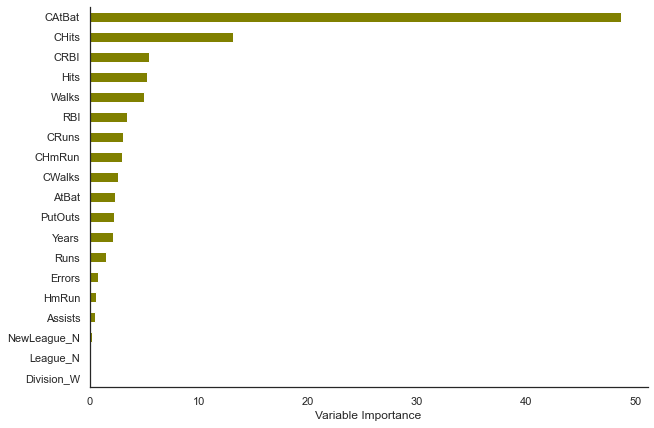

In [38]:
gbr_featureimportance = pd.DataFrame({'Feature Importance': reg_boosting.feature_importances_*100}, index=X.columns)
gbr_featureimportance.sort_values('Feature Importance', ascending=True).plot(kind='barh', color='olive',  figsize=(10, 7))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

**Qno. 9**

**Now apply bagging to the training set. What is the test set MSE for this approach?**

Ans The value for the test set MSE is 0.24

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [40]:
reg_bagging = RandomForestRegressor(max_features=19, random_state=123)
reg_bagging.fit(X_train, y_train)
reg_bagging_pred = reg_bagging.predict(X_test)
reg_bagging_mse = mean_squared_error(reg_bagging_pred, y_test)
print('reg_bagging MSE: ', reg_bagging_mse)

reg_bagging MSE:  0.2400530658637807


**Qno. 10**

**Which variables appear to be the most important predictors in the bagging model?**

Ans Here the below graph we can see CAtBat predictor has the most feature importance.

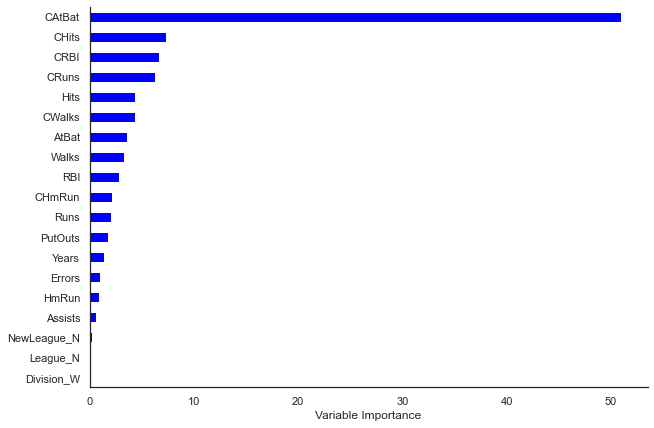

In [41]:
bagging_featureImportance = pd.DataFrame({'Feature Importance': reg_bagging.feature_importances_*100}, index=X.columns)
bagging_featureImportance.sort_values('Feature Importance', ascending=True).plot(kind='barh', color='b', figsize = (10,7))
plt.xlabel('Variable Importance')
plt.gca().legend_ = None